# Introduction

This project will focus on utilizng customer data collected by the gym chain Model Fitness to analyize customer churn. The goal of the analysis will be to propose actionable customer retention strategies to minimize customer churn. I will be diving in to demographic analysis to forcast and predict churn rates in the hope of identifying key factors contributing to loss of customers. 

# Initialization

In [1]:
#data preprocessing and upload
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# importing the dataset with a try/except clause

try: 
    gym = pd.read_csv('datasets/moved_gym_churn_us.csv')
                       
except:
    gym = pd.read_csv('/datasets/moved_gym_churn_us.csv')

gym.head()



,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


#### Dataset Column Description

Binary Columns:

- `gender`
- `Near_Location` — whether the user lives or works in the neighborhood where the gym is located
- `Partner` — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)
- `Promo_friends` — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)
- `Phone` — whether the user provided their phone number
- `Churn` - the fact of churn for the month in question


Int/Float Columns:
- `Contract_period` — 1 month, 3 months, 6 months, or 1 year
- `Group_visits` — whether the user takes part in group sessions
- `Age`
- `Avg_additional_charges_total` — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.
- `Month_to_end_contract` — the months remaining until the contract expires
- `Lifetime` — the time (in months) since the customer first came to the gym
- `Avg_class_frequency_total` — average frequency of visits per week over the customer's lifetime
- `Avg_class_frequency_current_month` — average frequency of visits per week over the preceding month
- `Avg_additional_charges_total` — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

## Data Preprocessing & EDA

In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

#### Dataset Notes

The dataset is in good shape with no null values. The only dtype that needs to be updated is `Month_to_end_contract`. There is a variety of "quality of life" changes that could be made like making all column titles lower case or changing the binary columns from int64 to category but given the data set is already less that 500 KB these changes are unnecessary. 

In [4]:
# fixing the `month` dtype

gym['Month_to_end_contract'] = gym['Month_to_end_contract'].astype('datetime64[M]')
gym['Month_to_end_contract'] = gym['Month_to_end_contract'].dt.month

In [5]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,3.75075,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,3.13378,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,2.00000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,2.00000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,7.00000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.00000,31.000000,6.023668,6.146783,1.000000


#### Data Describe Notes

Looking at the results of the `describe` aspects such as `Near_Location`, `Avg_additional_charges_total`, `Partner`, and `Promo_friends` will all be useful when considering the ideal customer profile to minimize churn. 

In [6]:
# grouping df by Churn & mean

gym.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,4.196666,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,2.515551,0.990575,1.474995,1.044546


#### Churn Mean Notes

From the above table we can see that users who are close to their gym location and connected  to the gym in some manner, either through their employment or a friend, are more likely to remain active. Additionally, once a customer has developed a consistent gym habit they are more likely to continue, users with churn have shorter lifetimes and contract periods. Customers involved in group classes or those that spent money on additinal charges also had lower churn than those that were not. 

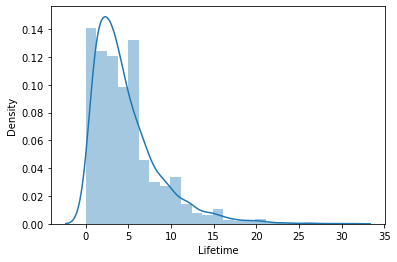

In [7]:
# lifetime in users without churn

sns.distplot(gym[gym['Churn'] == 0]['Lifetime'], bins = 25);

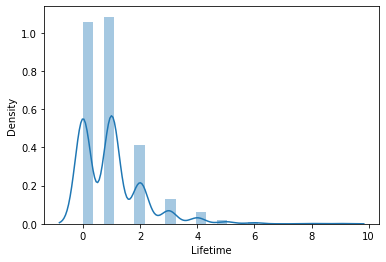

In [8]:
# lifetime in users with churn

sns.distplot(gym[gym['Churn'] == 1]['Lifetime'], bins = 25);

In [9]:
# building a corr matrix

corr_matrix = gym.corr()
corr_matrix

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001002,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.078473,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.166219,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.135185,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.010325,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.494296,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.084774,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.097779,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.040494,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001002,0.078473,0.166219,0.135185,-0.010325,0.494296,0.084774,0.097779,0.040494,1.000000,0.102490,0.082060,0.117793,-0.236854


<AxesSubplot:>

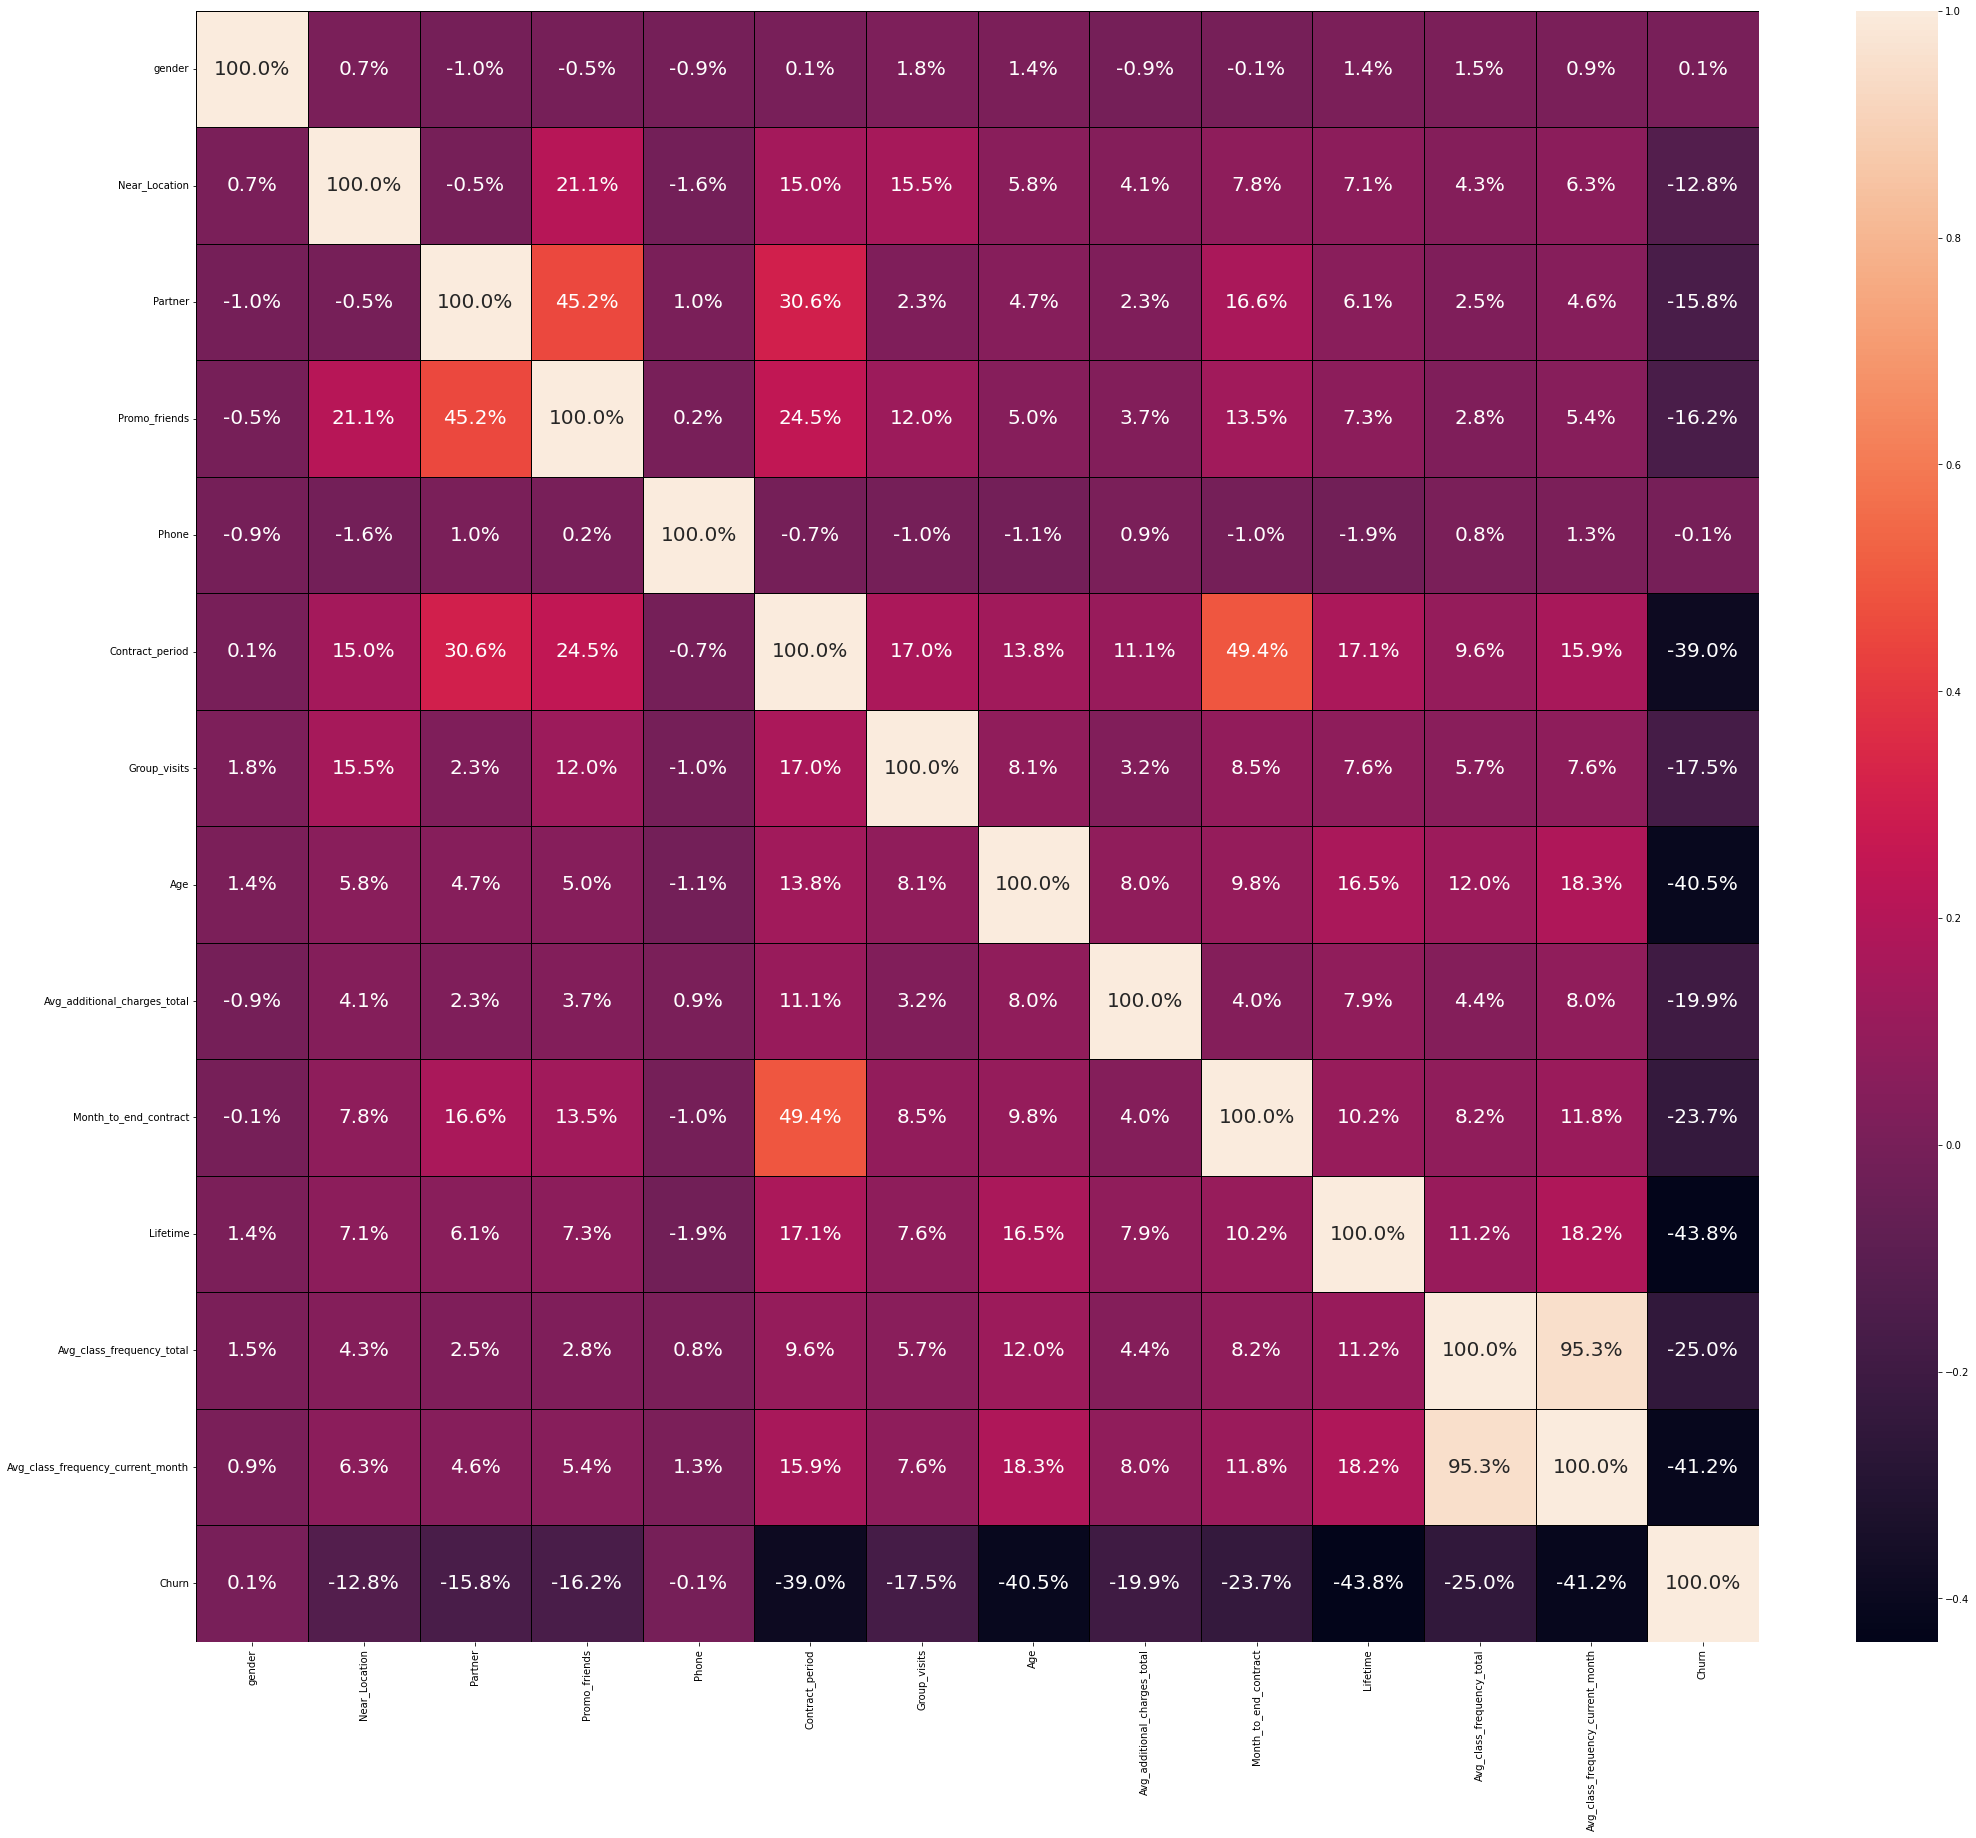

In [10]:
# graphing the corr matrix heatmap

plt.figure(figsize = (35,30))
sns.heatmap(corr_matrix, annot = True, annot_kws={"size": 20}, fmt = '.1%', linewidths = 1, linecolor = 'black')


#### Correlation Heatmap Notes

The above heatmap reflects my above statement regarding the `Churn` means. We can see the strongest negative correlations between `Churn` and `Avg_class_frequency_current_month`, `Lifetime`, `Age` and `Current_period`. `Month_to_end_contract` also has high negative correlation with `Churn` which makes sense as customers close to the end of their contract may choose not to renew. While less than the previous features `Avg_additional_charges_total`, `Promo_friend`, `Partner`, and `Near_location` also have negative correlation with `Churn`.

## Churn Prediction Model

In [11]:
# import train_test_split

from sklearn.model_selection import train_test_split

In [12]:
# divide the data into features and a target variable
X = gym.drop('Churn', axis = 1)
y = gym['Churn']

In [13]:
# divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 

**I will be training the model using two methods: Logistic Regression and Random Forest**

In [14]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# you can play with the parameters
# don't forget to add random_state
log_model = LogisticRegression(random_state = 0) 

log_model = log_model.fit(X_train, y_train)

In [15]:
y_pred = log_model.predict(X_test)

In [16]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

for_model = RandomForestClassifier(random_state = 0)
# fit the model and predict the results

for_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [17]:
y_pred2 = for_model.predict(X_test)

In [18]:
#Accuracy

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [19]:
# Logistic Regression
print("Accuracy =", round(accuracy_score(y_test, y_pred),4))

Accuracy = 0.9


In [20]:
#Precision and recall

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision =", round(precision, 4))
print("Recall =", round(recall, 4))

Precision = 0.798
Recall = 0.798


In [21]:
# Calculate accuracy, precision and recall for the RF model

print("Accuracy =", round(accuracy_score(y_test, y_pred2), 4))

precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)

print("Precision =", round(precision, 4))
print("Recall =", round(recall, 4))

Accuracy = 0.9162
Precision = 0.8466
Recall = 0.8081


#### Churn Prediction Model Notes

After testing both the Logistic Regression and Random Forest model we can see that Random Forest is more accurate to that data we have for accuracy, precision, and recall. 

## User Clusters

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
X_sc = scaler.fit_transform(X)

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage 

# the matrix of distances also helps to determine the optimal number of clusters
linked = linkage(X_sc, method = 'ward') 

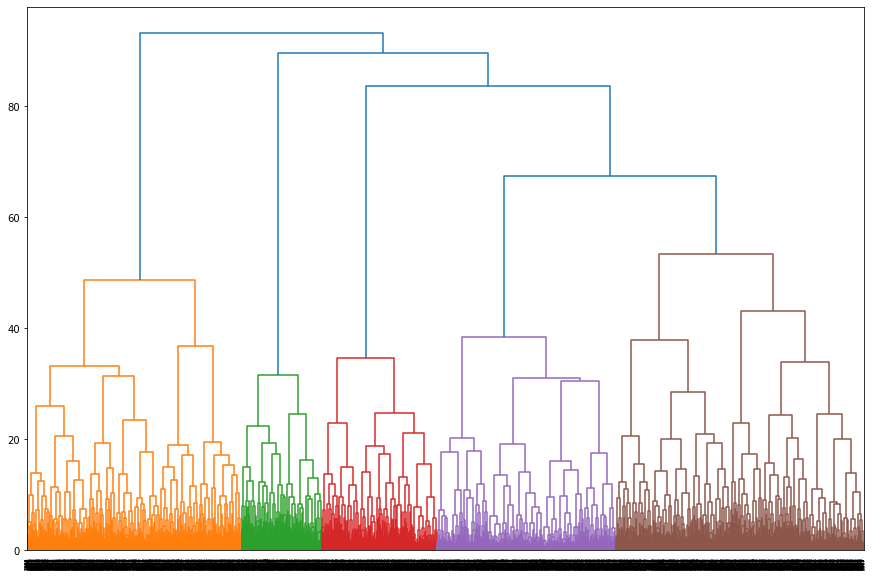

In [24]:
#plot the dendrogram

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

In [25]:
# train the clustering module with K-Means, using n=5 

from sklearn.cluster import KMeans

km = KMeans(n_clusters = 5, random_state = 0) 
labels = km.fit_predict(X_sc) 

In [26]:
labels.mean()

1.6085

In [27]:
gym['cluster_km'] = labels

In [28]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,6,3,0.020398,0.000000,0,3
1,0,1,0,0,1,12,1,31,113.202938,1,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,2,2,1.859098,1.736502,0,1
3,0,1,1,1,1,12,1,33,62.669863,1,2,3.205633,3.357215,0,2
4,1,1,1,1,1,1,0,26,198.362265,2,3,1.113884,1.120078,0,1


In [29]:
gym.groupby(['cluster_km']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.562569,0.974529,0.276855,0.112957,0.998893,4.451827,0.461794,30.133998,162.442561,3.380952,4.944629,2.854951,2.856904,0.053156
1,0.482217,1.000000,0.299421,0.181141,1.000000,2.243176,0.329198,28.114144,130.434368,2.577337,2.400331,1.218832,0.978884,0.526055
2,0.501545,0.988671,0.920700,0.775489,1.000000,8.907312,0.567456,29.928939,160.341171,5.898043,4.612770,1.917891,1.901072,0.051493
3,0.524675,0.862338,0.472727,0.306494,0.000000,4.758442,0.425974,29.283117,144.240418,3.836364,3.922078,1.846575,1.716160,0.267532
4,0.490602,0.000000,0.486842,0.078947,1.000000,2.842105,0.223684,28.573308,135.658440,3.063910,2.900376,1.675350,1.500545,0.421053


#### Cluster Mean Notes

My initial notes from looking at the means of the clusters I've made is that cluster 1 and cluster 4 have the highest mean churn mates. These groups have the lowest `Contract_periods`, the fewest `Group_visits`, the lowest `Avg_additional_charges_total`, the shortest `Lifetime` and least remaining `Month_to_end_contract`. Finally they both have the lowest average class frequency both monthly and overall. 

### Cluster Relevent Feature Distributions

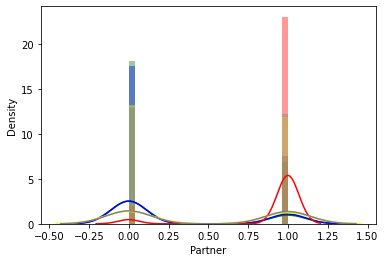

In [68]:
sns.distplot(gym[gym['cluster_km'] == 0]['Partner'], bins = 25, color = 'green');
sns.distplot(gym[gym['cluster_km'] == 1]['Partner'], bins = 25, color = 'blue');
sns.distplot(gym[gym['cluster_km'] == 2]['Partner'], bins = 25, color = 'red');
sns.distplot(gym[gym['cluster_km'] == 3]['Partner'], bins = 25, color = 'yellow');
sns.distplot(gym[gym['cluster_km'] == 4]['Partner'], bins = 25, color = 'grey');

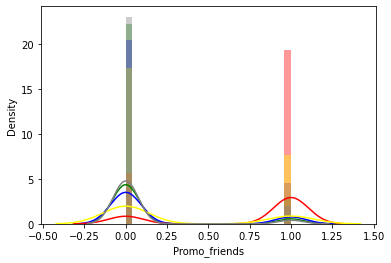

In [69]:
sns.distplot(gym[gym['cluster_km'] == 0]['Promo_friends'], bins = 25, color = 'green');
sns.distplot(gym[gym['cluster_km'] == 1]['Promo_friends'], bins = 25, color = 'blue');
sns.distplot(gym[gym['cluster_km'] == 2]['Promo_friends'], bins = 25, color = 'red');
sns.distplot(gym[gym['cluster_km'] == 3]['Promo_friends'], bins = 25, color = 'yellow');
sns.distplot(gym[gym['cluster_km'] == 4]['Promo_friends'], bins = 25, color = 'grey');

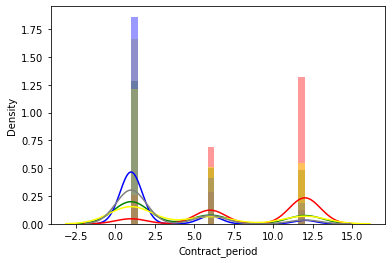

In [62]:
sns.distplot(gym[gym['cluster_km'] == 0]['Contract_period'], bins = 25, color = 'green');
sns.distplot(gym[gym['cluster_km'] == 1]['Contract_period'], bins = 25, color = 'blue');
sns.distplot(gym[gym['cluster_km'] == 2]['Contract_period'], bins = 25, color = 'red');
sns.distplot(gym[gym['cluster_km'] == 3]['Contract_period'], bins = 25, color = 'yellow');
sns.distplot(gym[gym['cluster_km'] == 4]['Contract_period'], bins = 25, color = 'grey');

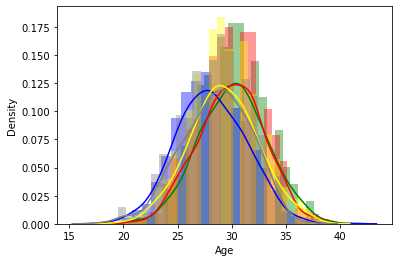

In [59]:
sns.distplot(gym[gym['cluster_km'] == 0]['Age'], bins = 25, color = 'green');
sns.distplot(gym[gym['cluster_km'] == 1]['Age'], bins = 25, color = 'blue');
sns.distplot(gym[gym['cluster_km'] == 2]['Age'], bins = 25, color = 'red');
sns.distplot(gym[gym['cluster_km'] == 3]['Age'], bins = 25, color = 'yellow');
sns.distplot(gym[gym['cluster_km'] == 4]['Age'], bins = 25, color = 'grey');

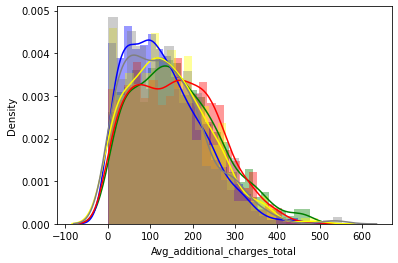

In [60]:
sns.distplot(gym[gym['cluster_km'] == 0]['Avg_additional_charges_total'], bins = 25, color = 'green');
sns.distplot(gym[gym['cluster_km'] == 1]['Avg_additional_charges_total'], bins = 25, color = 'blue');
sns.distplot(gym[gym['cluster_km'] == 2]['Avg_additional_charges_total'], bins = 25, color = 'red');
sns.distplot(gym[gym['cluster_km'] == 3]['Avg_additional_charges_total'], bins = 25, color = 'yellow');
sns.distplot(gym[gym['cluster_km'] == 4]['Avg_additional_charges_total'], bins = 25, color = 'grey');

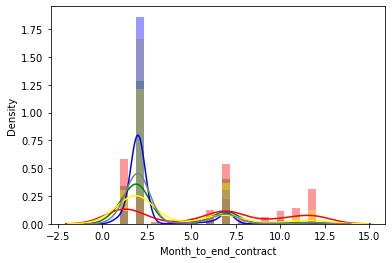

In [63]:
sns.distplot(gym[gym['cluster_km'] == 0]['Month_to_end_contract'], bins = 25, color = 'green');
sns.distplot(gym[gym['cluster_km'] == 1]['Month_to_end_contract'], bins = 25, color = 'blue');
sns.distplot(gym[gym['cluster_km'] == 2]['Month_to_end_contract'], bins = 25, color = 'red');
sns.distplot(gym[gym['cluster_km'] == 3]['Month_to_end_contract'], bins = 25, color = 'yellow');
sns.distplot(gym[gym['cluster_km'] == 4]['Month_to_end_contract'], bins = 25, color = 'grey');

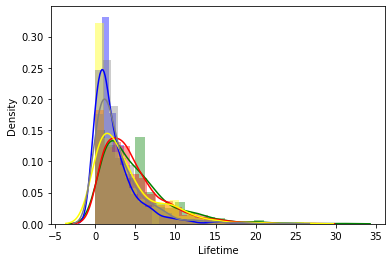

In [64]:
sns.distplot(gym[gym['cluster_km'] == 0]['Lifetime'], bins = 25, color = 'green');
sns.distplot(gym[gym['cluster_km'] == 1]['Lifetime'], bins = 25, color = 'blue');
sns.distplot(gym[gym['cluster_km'] == 2]['Lifetime'], bins = 25, color = 'red');
sns.distplot(gym[gym['cluster_km'] == 3]['Lifetime'], bins = 25, color = 'yellow');
sns.distplot(gym[gym['cluster_km'] == 4]['Lifetime'], bins = 25, color = 'grey');

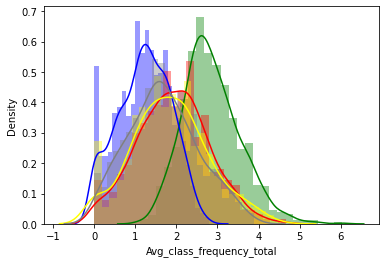

In [65]:
sns.distplot(gym[gym['cluster_km'] == 0]['Avg_class_frequency_total'], bins = 25, color = 'green');
sns.distplot(gym[gym['cluster_km'] == 1]['Avg_class_frequency_total'], bins = 25, color = 'blue');
sns.distplot(gym[gym['cluster_km'] == 2]['Avg_class_frequency_total'], bins = 25, color = 'red');
sns.distplot(gym[gym['cluster_km'] == 3]['Avg_class_frequency_total'], bins = 25, color = 'yellow');
sns.distplot(gym[gym['cluster_km'] == 4]['Avg_class_frequency_total'], bins = 25, color = 'grey');

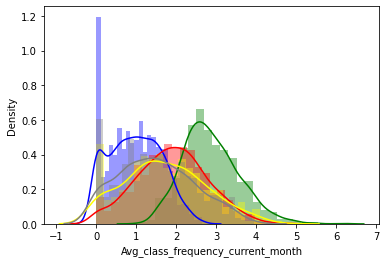

In [66]:
sns.distplot(gym[gym['cluster_km'] == 0]['Avg_class_frequency_current_month'], bins = 25, color = 'green');
sns.distplot(gym[gym['cluster_km'] == 1]['Avg_class_frequency_current_month'], bins = 25, color = 'blue');
sns.distplot(gym[gym['cluster_km'] == 2]['Avg_class_frequency_current_month'], bins = 25, color = 'red');
sns.distplot(gym[gym['cluster_km'] == 3]['Avg_class_frequency_current_month'], bins = 25, color = 'yellow');
sns.distplot(gym[gym['cluster_km'] == 4]['Avg_class_frequency_current_month'], bins = 25, color = 'grey');

#### Cluster Dist Notes

Looking at the feature distributions for my clusters I can immediatly see that cluster '1' (blue) followed by cluster '4' (grey) will have the highest churn. This cluster had the shortest contract periods and lifetime, was generally the youngest, spent the least additional money and attended the fewest classes. 

I anticipate clusters '0' (green) and '2' (red) will have the lowest churn as these two clusters tended to be older, attended the most classes, and spent more additional money.

In [47]:
# calculating the churn rate for each cluster

gym.groupby(['cluster_km'])['Churn'].value_counts(normalize = True)

cluster_km  Churn
0           0        0.946844
            1        0.053156
1           1        0.526055
            0        0.473945
2           0        0.948507
            1        0.051493
3           0        0.732468
            1        0.267532
4           0        0.578947
            1        0.421053
Name: Churn, dtype: float64

#### Churn Rate Notes

As I posited above clusters 1 and 4 have the highest churn rates (.526 and .421, respectively) while clusters 0 and 2 have the lowest (.053 and .051, respectively).

## Churn Analysis Conclusion

Now that I have completed an analysis of the gym's churn data I can make some recommondations for strategies to reduce customer churn.

1. Offer monthly or quarterly discounts on additional gym services - users that spend additional money have lower churn. They are more likely to keep spending money so lowering the barrier for initial purchases may increase overall sales and encourage customers to take advantage of a variety of the gyms offerings.

2. Offer complimentary starting classes or otherwise incentivize new customers to attend classes - users that attend classes frequently have significantly lower churn rates so maximizing a customers class attendance will help create more loyal customers.

3. Look into creating more 'partner' customers - customers who are employees of 'partner' companies have lower churn than those who are not. Growing the partner network will both cause an influx of new customers but those new customer will likely have lower churn rates than new customers created from other means.